In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load dataset
file_path = "data.csv"  # Update with the correct file path
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,ts,v1,v2
0,2022-01-01 00:00:00,0.999036,0.318587
1,2022-01-01 01:00:00,0.695036,0.265836
2,2022-01-01 02:00:00,0.764995,0.320261
3,2022-01-01 03:00:00,0.297017,0.064074
4,2022-01-01 04:00:00,0.366184,0.083961


In [5]:
# Convert timestamp column to datetime format
df['ts'] = pd.to_datetime(df['ts'])

# Set timestamp as index
df.set_index('ts', inplace=True)

# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24592 entries, 2022-01-01 00:00:00 to 2024-10-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v1      24592 non-null  float64
 1   v2      24592 non-null  float64
dtypes: float64(2)
memory usage: 576.4 KB


In [7]:
# Count missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 v1    0
v2    0
dtype: int64


In [8]:
# Summary statistics for v1 and v2
df.describe()

,v1,v2
count,24592.000000,24592.000000
mean,1.385839,0.380771
std,1.154606,0.226058
min,0.000000,0.000000
25%,0.592698,0.194897
50%,1.017005,0.339869
75%,1.821109,0.554251
max,10.969931,0.978945


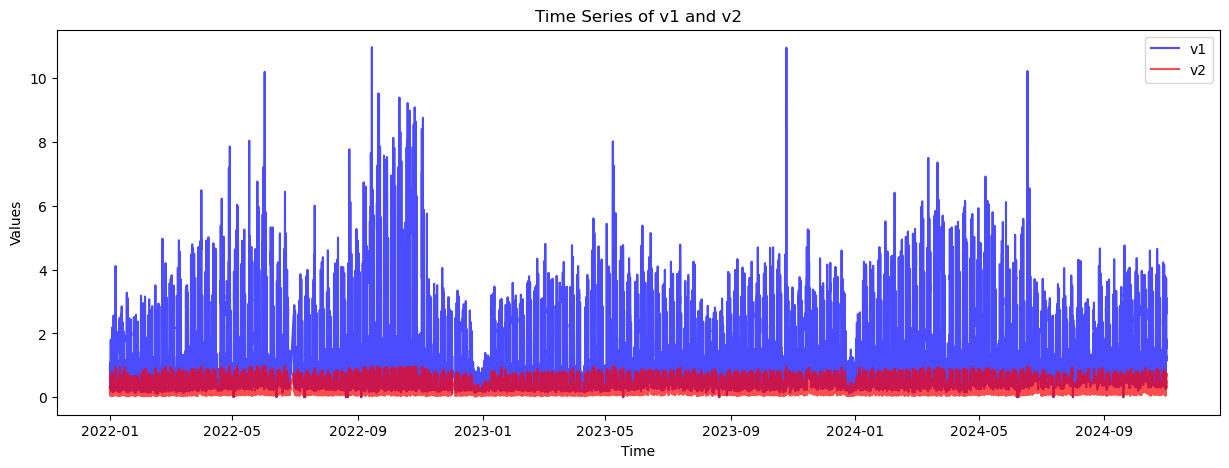

In [9]:
# Plot time series for v1 and v2
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['v1'], label='v1', color='blue', alpha=0.7)
plt.plot(df.index, df['v2'], label='v2', color='red', alpha=0.7)
plt.legend()
plt.title("Time Series of v1 and v2")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

Correlation Matrix:
           v1        v2
v1  1.000000  0.911494
v2  0.911494  1.000000


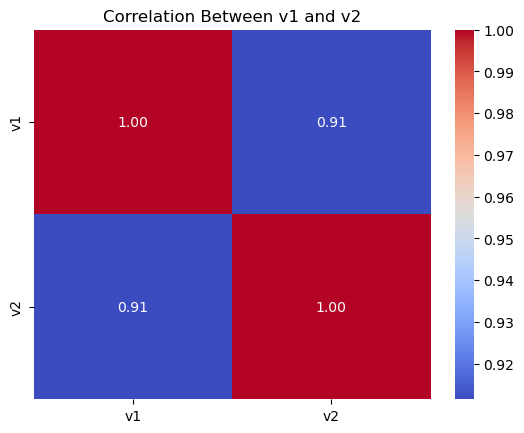

In [10]:
# Calculate correlation
correlation = df[['v1', 'v2']].corr()
print("Correlation Matrix:\n", correlation)

# Visualize correlation
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between v1 and v2")
plt.show()

#EDA 

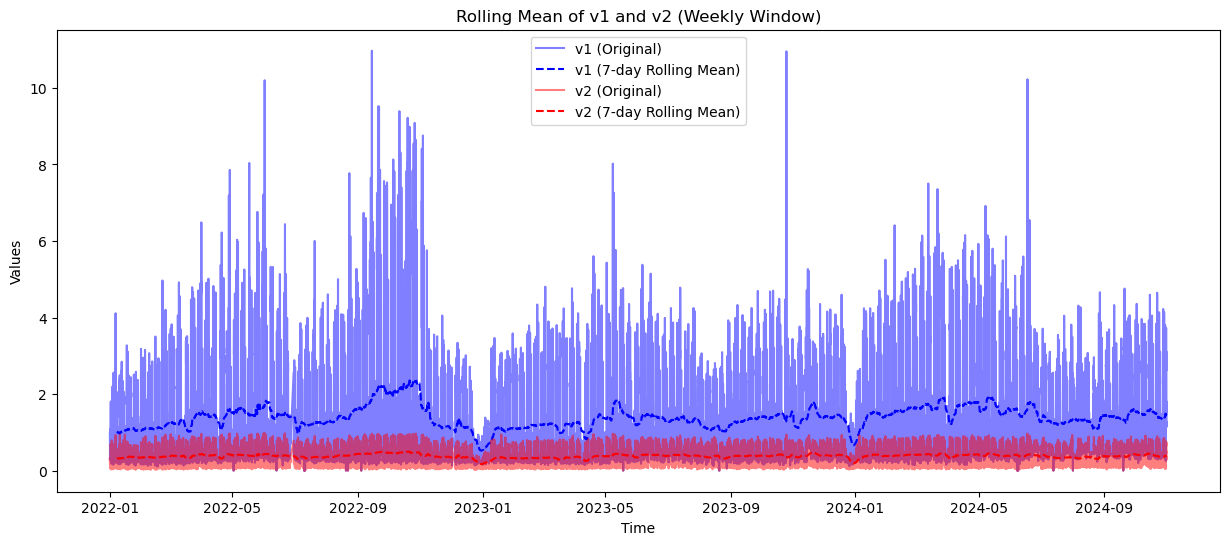

In [11]:
import numpy as np

# Rolling mean and standard deviation
window_size = 24 * 7  # Weekly window
df_rolling = df[['v1', 'v2']].rolling(window=window_size).mean()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['v1'], alpha=0.5, label="v1 (Original)", color="blue")
plt.plot(df_rolling.index, df_rolling['v1'], label="v1 (7-day Rolling Mean)", color="blue", linestyle="dashed")
plt.plot(df.index, df['v2'], alpha=0.5, label="v2 (Original)", color="red")
plt.plot(df_rolling.index, df_rolling['v2'], label="v2 (7-day Rolling Mean)", color="red", linestyle="dashed")
plt.legend()
plt.title("Rolling Mean of v1 and v2 (Weekly Window)")
plt.xlabel("Time")
plt.ylabel("Values")
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] < 0.05:
        print("✅ The time series is stationary (p < 0.05)")
    else:
        print("❌ The time series is NOT stationary (p >= 0.05)")

print("ADF Test for v1:")
adf_test(df['v1'])

print("\nADF Test for v2:")
adf_test(df['v2'])

ADF Test for v1:
ADF Statistic: -20.691860738532952
p-value: 0.0
Critical Values:
   1%: -3.4306164704426654
   5%: -2.861657771771178
   10%: -2.566832686487071
✅ The time series is stationary (p < 0.05)

ADF Test for v2:
ADF Statistic: -20.598352688554975
p-value: 0.0
Critical Values:
   1%: -3.4306164704426654
   5%: -2.861657771771178
   10%: -2.566832686487071
✅ The time series is stationary (p < 0.05)


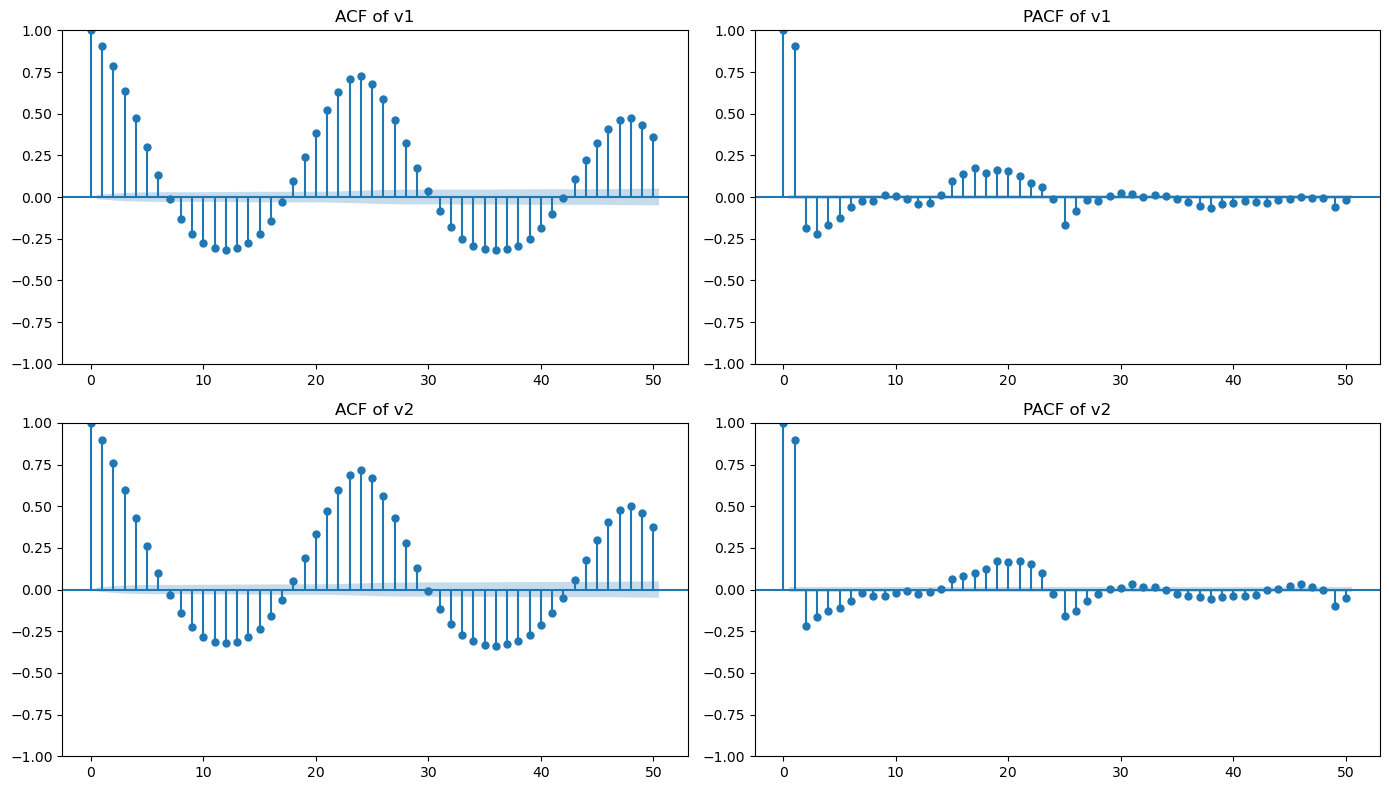

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# ACF and PACF for v1
plot_acf(df['v1'].dropna(), ax=axes[0, 0], lags=50)
axes[0, 0].set_title("ACF of v1")
plot_pacf(df['v1'].dropna(), ax=axes[0, 1], lags=50)
axes[0, 1].set_title("PACF of v1")

# ACF and PACF for v2
plot_acf(df['v2'].dropna(), ax=axes[1, 0], lags=50)
axes[1, 0].set_title("ACF of v2")
plot_pacf(df['v2'].dropna(), ax=axes[1, 1], lags=50)
axes[1, 1].set_title("PACF of v2")

plt.tight_layout()
plt.show()

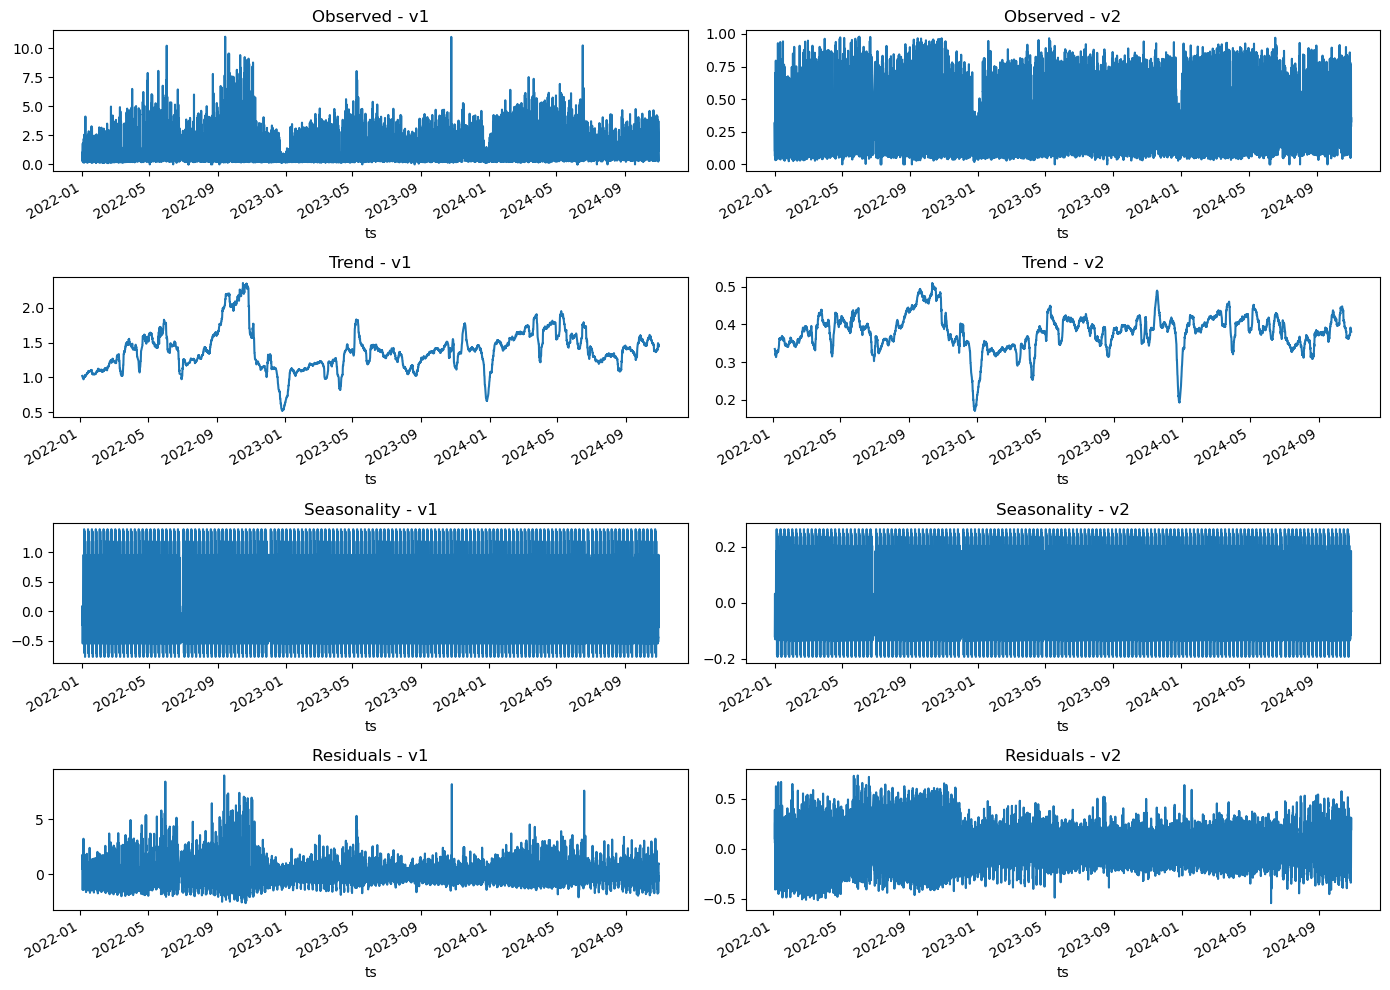

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose v1 and v2
result_v1 = seasonal_decompose(df['v1'], model='additive', period=24*7)
result_v2 = seasonal_decompose(df['v2'], model='additive', period=24*7)

# Plot decomposition
fig, axes = plt.subplots(4, 2, figsize=(14, 10))

# v1 decomposition
result_v1.observed.plot(ax=axes[0, 0], title="Observed - v1")
result_v1.trend.plot(ax=axes[1, 0], title="Trend - v1")
result_v1.seasonal.plot(ax=axes[2, 0], title="Seasonality - v1")
result_v1.resid.plot(ax=axes[3, 0], title="Residuals - v1")

# v2 decomposition
result_v2.observed.plot(ax=axes[0, 1], title="Observed - v2")
result_v2.trend.plot(ax=axes[1, 1], title="Trend - v2")
result_v2.seasonal.plot(ax=axes[2, 1], title="Seasonality - v2")
result_v2.resid.plot(ax=axes[3, 1], title="Residuals - v2")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
import pmdarima as pm

# Fit Auto-ARIMA for v1
auto_arima_v1 = pm.auto_arima(df['v1'], seasonal=True, m=24, stepwise=True, suppress_warnings=True)
print(auto_arima_v1.summary())

# Fit Auto-ARIMA for v2
auto_arima_v2 = pm.auto_arima(df['v2'], seasonal=True, m=24, stepwise=True, suppress_warnings=True)
print(auto_arima_v2.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.0 MB/s eta 0:00:00a 0:00:01


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA models
sarima_v1 = SARIMAX(df['v1'], order=auto_arima_v1.order, seasonal_order=auto_arima_v1.seasonal_order)
sarima_v2 = SARIMAX(df['v2'], order=auto_arima_v2.order, seasonal_order=auto_arima_v2.seasonal_order)

# Fit models
sarima_v1_fit = sarima_v1.fit()
sarima_v2_fit = sarima_v2.fit()

# Forecast 30 days ahead (hourly resolution)
future_dates = pd.date_range(start="2024-11-01 00:00", periods=24*30, freq='H')

forecast_v1_sarima = sarima_v1_fit.forecast(steps=24*30)
forecast_v2_sarima = sarima_v2_fit.forecast(steps=24*30)

# Convert to DataFrame
sarima_forecast = pd.DataFrame({'timestamp': future_dates, 'v1': forecast_v1_sarima, 'v2': forecast_v2_sarima})

In [ ]:
!pip install prophet
from prophet import Prophet

# Prepare data
df_prophet_v1 = df[['v1']].reset_index().rename(columns={'timestamp': 'ds', 'v1': 'y'})
df_prophet_v2 = df[['v2']].reset_index().rename(columns={'timestamp': 'ds', 'v2': 'y'})

# Initialize and fit Prophet model
prophet_v1 = Prophet()
prophet_v1.fit(df_prophet_v1)

prophet_v2 = Prophet()
prophet_v2.fit(df_prophet_v2)

# Create future DataFrame
future_prophet = prophet_v1.make_future_dataframe(periods=24*30, freq='H')

# Forecast
forecast_v1_prophet = prophet_v1.predict(future_prophet)
forecast_v2_prophet = prophet_v2.predict(future_prophet)

# Extract forecasted values
prophet_forecast = pd.DataFrame({
    'timestamp': future_prophet['ds'],
    'v1': forecast_v1_prophet['yhat'],
    'v2': forecast_v2_prophet['yhat']
})

In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['v1', 'v2']])

# Convert to supervised learning format
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

# Define window size
n_steps = 24  # Use past 24 hours to predict next value

# Create sequences
X, y = create_sequences(scaled_data, n_steps)

# Split data into training and testing
split = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

# Build LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 2)),
    LSTM(50, activation='relu'),
    Dense(2)  # Output two values (v1, v2)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
# Make predictions
lstm_predictions = []

last_sequence = X[-1]  # Start with the last available sequence
for _ in range(24*30):  # Predict 30 days (hourly)
    pred = model.predict(last_sequence.reshape(1, n_steps, 2))
    lstm_predictions.append(pred[0])
    
    # Update sequence with new prediction
    last_sequence = np.vstack([last_sequence[1:], pred])

# Convert predictions back to original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Convert to DataFrame
lstm_forecast = pd.DataFrame({
    'timestamp': future_dates,
    'v1': lstm_predictions[:, 0],
    'v2': lstm_predictions[:, 1]
})

In [ ]:
from sklearn.metrics import r2_score

# Function to compute R² score
def evaluate_model(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Compute R² scores
r2_sarima_v1 = evaluate_model(df['v1'][-24*30:], sarima_forecast['v1'])
r2_sarima_v2 = evaluate_model(df['v2'][-24*30:], sarima_forecast['v2'])

r2_prophet_v1 = evaluate_model(df['v1'][-24*30:], prophet_forecast['v1'])
r2_prophet_v2 = evaluate_model(df['v2'][-24*30:], prophet_forecast['v2'])

r2_lstm_v1 = evaluate_model(df['v1'][-24*30:], lstm_forecast['v1'])
r2_lstm_v2 = evaluate_model(df['v2'][-24*30:], lstm_forecast['v2'])

# Print results
print("SARIMA R² v1:", r2_sarima_v1, "| R² v2:", r2_sarima_v2)
print("Prophet R² v1:", r2_prophet_v1, "| R² v2:", r2_prophet_v2)
print("LSTM R² v1:", r2_lstm_v1, "| R² v2:", r2_lstm_v2)

In [ ]:
# Select the best model based on total R²
best_model = max([
    ("SARIMA", r2_sarima_v1 + r2_sarima_v2, sarima_forecast),
    ("Prophet", r2_prophet_v1 + r2_prophet_v2, prophet_forecast),
    ("LSTM", r2_lstm_v1 + r2_lstm_v2, lstm_forecast)
], key=lambda x: x[1])

print(f"Best Model: {best_model[0]} with combined R² = {best_model[1]}")
final_forecast = best_model[2]